In [3]:
import commonmethods.image_modification as im

image = im.load_image_grayscale('5')

resized_image = im.resize_image(image, 1024)

## RGB

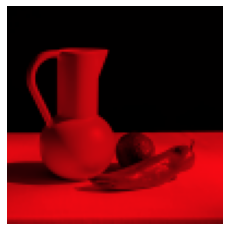

In [14]:
import cv2
from matplotlib import pyplot as plt

resized_image2 = im.resize_image(image, 100)

test = cv2.cvtColor(resized_image2, cv2.COLOR_GRAY2RGB)

R = 255
G = 10
B = 20
for i in range(0, 100):
    for j in range(0, 99):
        Y = resized_image2[i][j]
        R_new = Y*R/255
        G_new = Y*G/255
        B_new = Y*B/255
        test[i][j] = [R_new, G_new, B_new]
        
plt.axis("off")

plt.imshow(test)

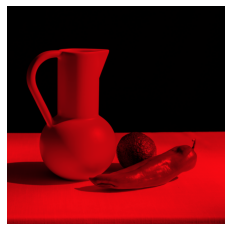

In [16]:
'''
We first split the grayscale image into individual BGR channels using cv2.split().
This will give us separate B, G, and R channels each with the same values.
Next we multiply each channel with a scalar value using np.multiply().
Finally we combine each individual channel into a color image using cv2.merge() to create a single multi-channel array
'''
import numpy as np
import cv2

converted_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

r, g, b = cv2.split(converted_image)

color = [255, 10, 20]

np.multiply(r, color[0]/255, out=r, casting="unsafe")
np.multiply(g, color[1]/255, out=g, casting="unsafe")
np.multiply(b, color[2]/255, out=b, casting="unsafe")

colored_image = cv2.merge([r, g, b])

plt.axis("off")

plt.imshow(colored_image)

## HSV

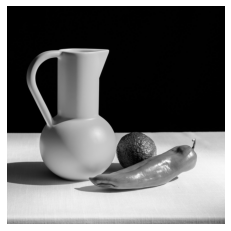

In [5]:
import colorsys
green = colorsys.rgb_to_hsv(0, 255, 0)

colored_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

hsv_image = cv2.cvtColor(colored_image, cv2.COLOR_RGB2HSV)

test = hsv_image

for i in range(1024):
    for j in range(1024):
        test[i][j] = [green[0], hsv_image[i][j][1], hsv_image[i][j][2]]

plt.axis("off")

test_rgb = cv2.cvtColor(test, cv2.COLOR_HSV2RGB)

plt.imshow(test_rgb)